# H1N1 FLU VACCINATION PROJECT

## BUSINESS UNDERSTANDING


#### The goal of this project is to leverage the data collected in the National 2009 H1N1 Flu Survey to predict whether individuals received the H1N1 flu vaccine. By understanding the factors influencing personal vaccination patterns, we aim to provide valuable insights that can guide public health efforts. The analysis will focus on uncovering the relationships between individuals' backgrounds, opinions, and health behaviors and their decisions regarding flu vaccination. The project aims to contribute to the ongoing efforts to vaccinate the global population against infectious diseases and viruses, such as the recent viral outbreak of COVID-19, with a particular focus on the experiences from the H1N1 flu outbreak in 2009.


## STAKEHOLDER UNDERSTANDING


#### Assist public health officials seeking insights into vaccination patterns and aid various stakeholders interested in optimizing vaccine distribution strategies.

## DATA SOURCE



#### The data for this project is sourced from the National 2009 H1N1 Flu Survey, consisting of information related to 26, 707 individuals' backgrounds, opinions, and health behaviors during the H1N1 flu outbreak. The dataset encompasses a diverse set of features, including demographic information, socio-economic status, health-related attitudes, and behaviors. The primary focus of the dataset is to understand the factors influencing personal vaccination patterns for the H1N1 flu vaccine.

# DATA UNDERSTANDING

In [1]:
import warnings
warnings.filterwarnings(action= 'ignore', category= FutureWarning)

In [2]:
# importing all necessary libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, auc
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import calibration_curve



%matplotlib inline 

In [3]:
# loading our training dataset
training_features = pd.read_csv('training_set_features.csv')
training_features.head(10)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN


## Data Preprocessing

In [4]:
# Displaying general information about the dataset
training_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [5]:
# drop columns unrelated to h1n1 vaccine

training_features.drop(columns=['opinion_seas_vacc_effective', 'opinion_seas_risk', 
                                'opinion_seas_sick_from_vacc', 'doctor_recc_seasonal'], inplace=True)
training_features

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [6]:
#checking for missing values
training_features.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
hhs_geo_region                     0
c

In [7]:
# Drop columns with high missing values
threshold = 0.5  # Threshold for dropping columns (50%)
cols_to_drop = training_features.columns[training_features.isnull().mean() > threshold]
training_features_dropped = training_features.drop(columns=cols_to_drop)

dropped_features = list(set(training_features.columns) - set(training_features_dropped.columns))

print(f"The feature that has been dropped is: {dropped_features} for exceeding the missing values threshold")

The feature that has been dropped is: ['employment_occupation'] for exceeding the missing values threshold


### Handling missing values

In [8]:

categorical_cols = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own',
                    'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry']
binary_cols = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
                  'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face',
                  'doctor_recc_h1n1', 'chronic_med_condition',
                  'child_under_6_months', 'health_worker', 'health_insurance']
numerical_cols = ['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 
                  'opinion_h1n1_sick_from_vacc', 'household_adults', 'household_children']

# Impute binary missing values with mode
binary_imputer = SimpleImputer(strategy='most_frequent')
training_features_dropped[binary_cols] = binary_imputer.fit_transform(training_features_dropped[binary_cols])

# Impute numerical missing values with median
numerical_imputer = SimpleImputer(strategy='median')
training_features_dropped[numerical_cols] = numerical_imputer.fit_transform(training_features_dropped[numerical_cols])

# Impute categorical missing values with a placeholder (you may want to explore more advanced methods for these)
training_features_dropped[categorical_cols] = training_features_dropped[categorical_cols].fillna('Unknown')


In [9]:
# checking if our missing values have been handled
training_features_dropped.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
employment

In [10]:
training_features_dropped.select_dtypes("object")

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,Unknown
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",Unknown
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf
...,...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,Unknown
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr
26704,55 - 64 Years,Some College,White,Female,Unknown,Not Married,Own,Unknown,lzgpxyit,"MSA, Not Principle City",Unknown
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,fcxhlnwr


In [11]:
# Dataset containing data of if a person was vaccinated or not 1 = yes & 0 = no
vaccination_status = pd.read_csv("training_set_labels.csv")
vaccination_status

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [12]:
# Checking the distribution of our target variable h1n1 vaccine
distribution = vaccination_status["h1n1_vaccine"].value_counts(normalize=True)*100
print(f"The number of people vaccinated are {distribution[1]}%")

The number of people vaccinated are 21.24536638334519%


In [13]:
# Merge h1n1_vaccine feature to our training_features_dropped dataframe

merged_df = pd.merge(training_features_dropped, vaccination_status[['respondent_id', 'h1n1_vaccine']], on='respondent_id', how='left')
merged_df.head(10)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,Unknown,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,Unknown,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,Unknown,0


In [14]:
merged_df.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty                  object
marital_status                  object
rent_or_own                     object
employment_status        

In [15]:
#checking if the new column feature h1n1_vaccine has null values
merged_df["h1n1_vaccine"].isnull().sum()

0

In [16]:
# Identify numeric columns
numeric_columns = merged_df.select_dtypes(include=['number', 'float']).columns

# Calculate the correlation matrix
correlation_matrix = merged_df[numeric_columns].corr()

# Extract correlation values with 'h1n1_vaccine' column
correlation_with_vaccine = correlation_matrix['h1n1_vaccine'].sort_values(ascending=False)

correlation_with_vaccine

h1n1_vaccine                   1.000000
doctor_recc_h1n1               0.394086
opinion_h1n1_risk              0.320580
opinion_h1n1_vacc_effective    0.267352
health_worker                  0.168056
h1n1_concern                   0.121574
h1n1_knowledge                 0.117771
chronic_med_condition          0.094360
opinion_h1n1_sick_from_vacc    0.074580
behavioral_wash_hands          0.074570
behavioral_touch_face          0.070855
behavioral_face_mask           0.070413
child_under_6_months           0.066712
behavioral_avoidance           0.046837
health_insurance               0.041891
behavioral_antiviral_meds      0.040226
behavioral_outside_home        0.022080
behavioral_large_gatherings    0.018089
household_adults               0.007323
household_children            -0.002567
respondent_id                 -0.003280
Name: h1n1_vaccine, dtype: float64

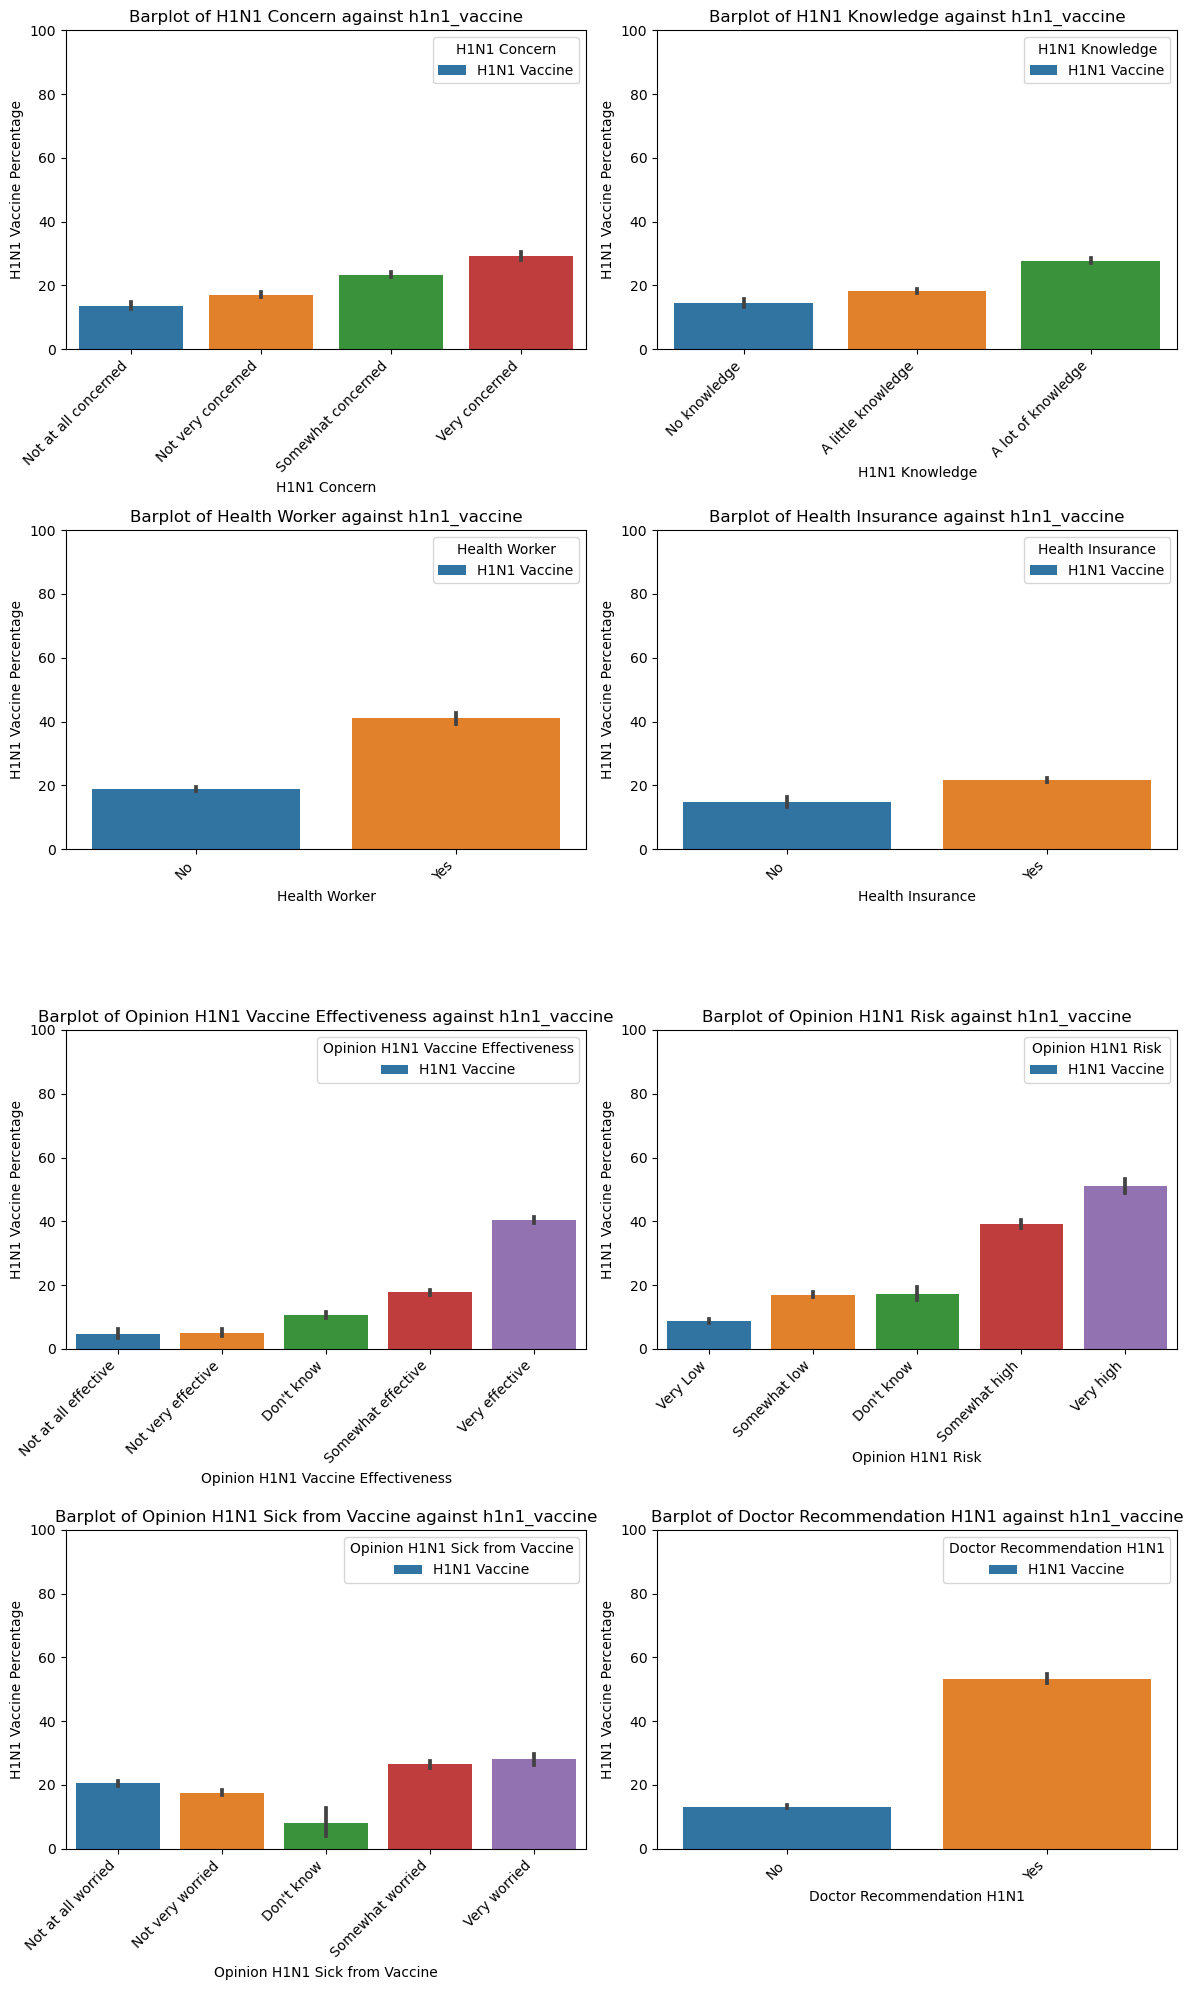

In [17]:
# visualizing relationships
plot_data = merged_df[['h1n1_concern', 'h1n1_knowledge', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 
                  'opinion_h1n1_sick_from_vacc', 'doctor_recc_h1n1', 'h1n1_vaccine']]

# Set up subplots for each feature
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 20))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Define custom labels for each barplot
custom_labels = {
    'h1n1_concern': {0: 'Not at all concerned', 1: 'Not very concerned', 2: 'Somewhat concerned', 3: 'Very concerned'},
    'h1n1_knowledge': {0: 'No knowledge', 1: 'A little knowledge', 2: 'A lot of knowledge'},
    'health_insurance': {0: 'No', 1: 'Yes'},
    'health_worker': {0: 'No', 1: 'Yes'},
    'opinion_h1n1_vacc_effective': {1: 'Not at all effective', 2: 'Not very effective', 3: 'Don\'t know', 4: 'Somewhat effective', 5: 'Very effective'},
    'opinion_h1n1_risk': {1: 'Very Low', 2: 'Somewhat low', 3: 'Don\'t know', 4: 'Somewhat high', 5: 'Very high'},
    'opinion_h1n1_sick_from_vacc': {1: 'Not at all worried', 2: 'Not very worried', 3: 'Don\'t know', 4: 'Somewhat worried', 5: 'Very worried'},
    'doctor_recc_h1n1': {0: 'No', 1: 'Yes'},
}

# X axis label name change
x_custom_labels = {
    'h1n1_concern': 'H1N1 Concern',
    'h1n1_knowledge': 'H1N1 Knowledge',
    'health_insurance': 'Health Insurance',
    'health_worker': 'Health Worker',
    'opinion_h1n1_vacc_effective': 'Opinion H1N1 Vaccine Effectiveness',
    'opinion_h1n1_risk': 'Opinion H1N1 Risk',
    'opinion_h1n1_sick_from_vacc': 'Opinion H1N1 Sick from Vaccine',
    'doctor_recc_h1n1': 'Doctor Recommendation H1N1'
}

# Loop through each feature and create barplot
for i, feature in enumerate(plot_data.columns[:-1]):  # Exclude 'h1n1_vaccine'
    sns.barplot(x=feature, y=plot_data['h1n1_vaccine']*100, data=plot_data, ax=axes[i], label='H1N1 Vaccine')
    
    # Set custom labels for x and y axes
    axes[i].set_xlabel(x_custom_labels.get(feature, feature))
    axes[i].set_ylabel('H1N1 Vaccine Percentage')
    
     # Set x-axis tick labels based on the custom_labels dictionary
    if feature in custom_labels:
        axes[i].set_xticklabels([custom_labels[feature].get(label, label) for label in sorted(plot_data[feature].unique())], rotation=45, ha='right')
    
    # Set legend
    axes[i].legend(title=(x_custom_labels.get(feature, feature)), loc='upper right')
    axes[i].set_title(f'Barplot of {x_custom_labels.get(feature, feature)} against h1n1_vaccine')
    
    # Set y-axis limits
    axes[i].set_ylim(0, 100)

# Adjust layout
plt.tight_layout()
plt.show()

In [18]:
merged_df_2 = merged_df.copy()

In [19]:
# List of categorical columns
categorical_cols = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry']

# Apply one-hot encoding to the specified columns
merged_df_2_encoded = pd.get_dummies(merged_df_2, columns=categorical_cols)

# Convert Boolean values to integers (1s and 0s)
merged_df_2_encoded = merged_df_2_encoded.astype(int)

# Step 2: Concatenate the one-hot encoded columns with the original DataFrame
merged_df_2 = pd.concat([merged_df_2, merged_df_2_encoded], axis=1)

# Step 3: Drop the original 'age_group' column if needed
merged_df_2 = merged_df_2.drop(columns=categorical_cols, axis=1)

merged_df_2.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_industry_phxvnwax,employment_industry_pxcmvdjn,employment_industry_qnlwzans,employment_industry_rucpziij,employment_industry_saaquncn,employment_industry_vjjrobsf,employment_industry_wlfvacwt,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0


## Data Splitting

In [20]:
X = merged_df_2.drop(['h1n1_vaccine'], axis=1)
y = merged_df_2['h1n1_vaccine']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
y_test

,h1n1_vaccine,h1n1_vaccine
15772,0,0
9407,0,0
16515,0,0
23353,0,0
10008,0,0
...,...,...
25132,1,1
20086,0,0
5045,1,1
6340,0,0


### Standardize the data

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Dummy Classifier (Baseline Model)

In [23]:
# Selecting only one of the duplicate columns
y_test_single_column = y_test.iloc[:, [0]]  # Keep only the first 'h1n1_vaccine' column


# Concatenate multiple columns into a single NumPy array
y_test_array = np.array(y_test_single_column[['h1n1_vaccine']].values.flatten())

# Selecting only one of the duplicate columns
y_train_single_column = y_train.iloc[:, [0]]  # Keep only the first 'h1n1_vaccine' column


# Concatenate multiple columns into a single NumPy array
y_train_array = np.array(y_train_single_column[['h1n1_vaccine']].values.flatten())

In [24]:
print(len(X_test), len(y_test_array))

5342 5342


In [25]:
print(y_train_array)

[0 0 1 ... 0 0 0]


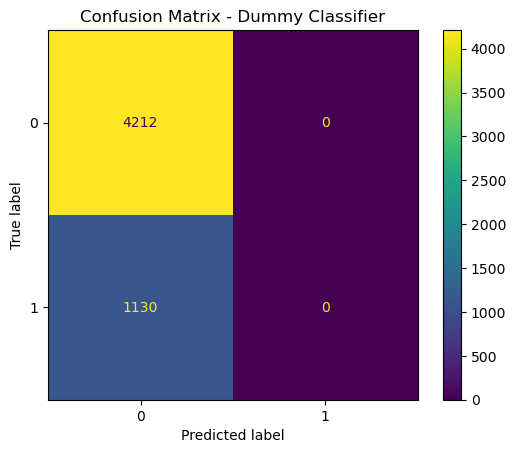

In [26]:
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train_scaled, y_train_array)
dummy_predictions = dummy_classifier.predict(X_test_scaled)

# Confusion Matrix for Dummy Classifier
cm_dummy = confusion_matrix(y_test_array, dummy_predictions)
disp_dummy = ConfusionMatrixDisplay(confusion_matrix=cm_dummy, display_labels=dummy_classifier.classes_)
disp_dummy.plot()
plt.title('Confusion Matrix - Dummy Classifier')
plt.show()

## Model Building
## Logistic Regression Model

Logistic Regression Model:
Accuracy: 0.8375140396855111

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4212
           1       0.70      0.41      0.52      1130

    accuracy                           0.84      5342
   macro avg       0.78      0.68      0.71      5342
weighted avg       0.82      0.84      0.82      5342



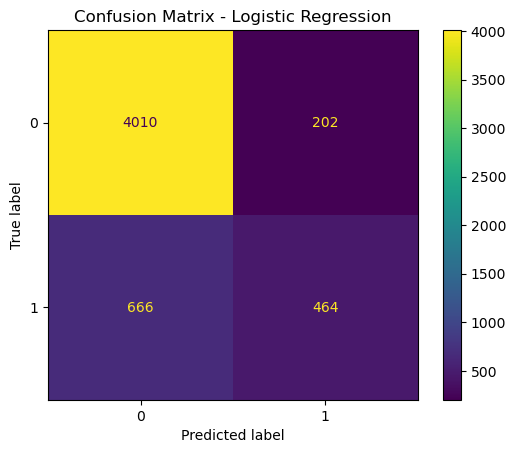

In [27]:
# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train_array)

# Make predictions on the test set
logreg_predictions = logreg_model.predict(X_test_scaled)

# Evaluate the Logistic Regression model
print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_test_array, logreg_predictions))
print("\nClassification Report:")
print(classification_report(y_test_array, logreg_predictions))

# Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test_array, logreg_predictions)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg_model.classes_)
disp_logreg.plot()
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

#### -> The Logistic Regression model achieved an accuracy of approximately 83.75% on the test set, meaning that the model correctly predicted the vaccination status for around 83.75% of the individuals in the test set.
#### -> For the positive class (1 - indicating vaccination), the precision is 0.70, implying that when the model predicts an individual to be vaccinated, it is correct about 70% of the time.
#### -> The recall for the positive class is 0.41, indicating that the model identified only 41% of the actual vaccinated individuals.
#### -> The precision for the negative class (0 - not vaccinated) is 0.86, suggesting that when the model predicts an individual not to be vaccinated, it is correct about 86% of the time.
#### -> The recall for the negative class is 0.95, indicating that the model successfully captured 95% of the individuals who were actually not vaccinated.
#### -> The weighted average F1-score is 0.82 which suggests a reasonably balanced trade-off between precision and recall, considering both positive and negative classes.

## Random Forest Model

Random Forest Model:
Accuracy: 0.8390116061400225

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4212
           1       0.70      0.42      0.52      1130

    accuracy                           0.84      5342
   macro avg       0.78      0.68      0.71      5342
weighted avg       0.83      0.84      0.82      5342



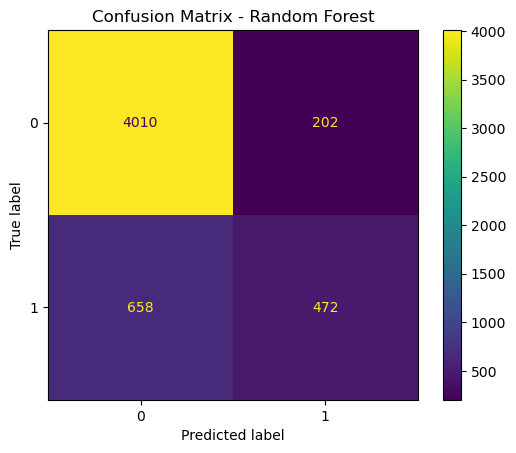

In [28]:
# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_array)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
print("Random Forest Model:")
print("Accuracy:", accuracy_score(y_test_array, rf_predictions))
print("\nClassification Report:")
print(classification_report(y_test_array, rf_predictions))

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test_array, rf_predictions)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot()
plt.title('Confusion Matrix - Random Forest')
plt.show()

#### -> The Random Forest model achieved an accuracy of approximately 83.90% on the test set, which implies that the model correctly predicted the vaccination status for around 83.90% of the individuals in the test set.
#### -> For the positive class (1 - indicating vaccination), the precision is 0.70, implying that when the model predicts an individual to be vaccinated, it is correct about 70% of the time.
#### -> The recall for the positive class is 0.42, indicating that the model identified only 42% of the actual vaccinated individuals.
#### -> The precision for the negative class (0 - not vaccinated) is 0.86, suggesting that when the model predicts an individual not to be vaccinated, it is correct about 86% of the time.
#### -> The recall for the negative class is 0.95, indicating that the model successfully captured 95% of the individuals who were actually not vaccinated.
#### -> The weighted average F1-score is 0.82, which suggests a reasonably balanced trade-off between precision and recall, considering both positive and negative classes.

## Model Comparison:
#### Let's compare the performance of the models using an ROC curve and AUC score:

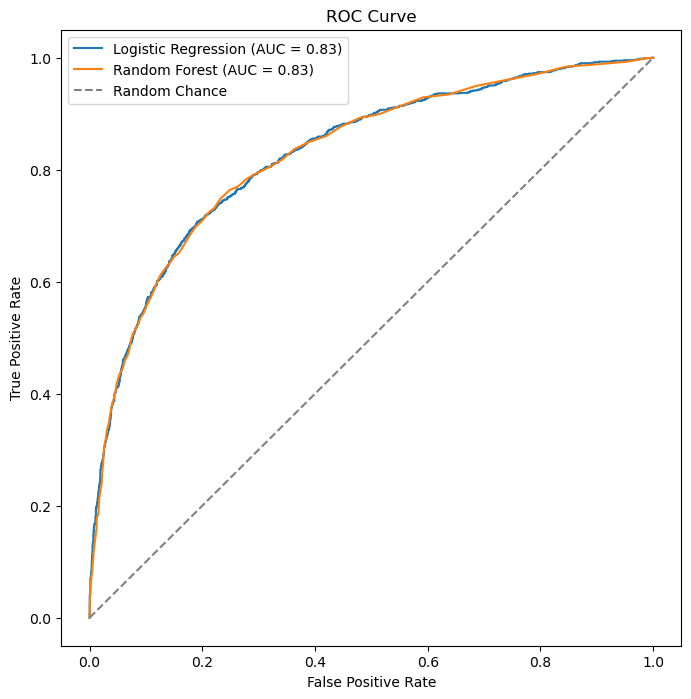

In [29]:
# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test_array, label):
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_array, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot ROC curves for both models
plt.figure(figsize=(8, 8))

# Logistic Regression
plot_roc_curve(logreg_model, X_test_scaled, y_test_array, 'Logistic Regression')

# Random Forest
plot_roc_curve(rf_model, X_test_scaled, y_test_array, 'Random Forest')

# Random Chance (diagonal line)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Comparison Between The Logistic Regression Model and The Random Forest Model

#### -> The Logistic Regression Model got an accuracy score of 83.75% whereas the Random Forest Model got a 83.90% score. Both models exhibit similar accuracy on the test set, with the Random Forest model slightly outperforming the Logistic Regression model.
#### -> In the Precision and Recall for Class 1 (Vaccinated) results, both models show similar performance in identifying individuals who received the vaccination, with the Random Forest model having a slightly higher recall.
#### -> In the Precision and Recall for Class 0 (Not Vaccinated) results, both models demonstrate high precision and recall for individuals who did not receive the vaccination, with no significant differences between them.
#### -> The Random Forest model performed slightly better in terms of false negatives and false positives, with fewer instances of misclassifications.
#### -> In summary, while both models offer similar overall performance, the Random Forest model shows a marginal advantage in some metrics. As such next I will fine-tune the Random Forest models to try ancd achieve potentially improved results.

## Hyperparameter Tuning (Random Forest)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   8.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   9.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=  13.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   4.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   9.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   9.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=  14.8s
[CV] END max_d

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  14.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  10.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=  15.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   4.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   5.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  10.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=  17.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   4.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   8.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estima

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  12.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  10.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=  17.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   5.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   4.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   6.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=  12.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=  11.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   3.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimat


Tuned Random Forest Model:
Accuracy: 0.8405091725945338

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4212
           1       0.71      0.42      0.52      1130

    accuracy                           0.84      5342
   macro avg       0.78      0.68      0.71      5342
weighted avg       0.83      0.84      0.82      5342



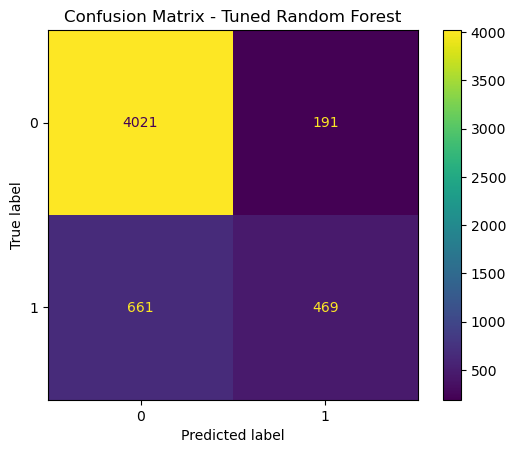

In [30]:
# Define hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest model
rf_model_tuned = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model_tuned, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train_array)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set with the tuned model
rf_tuned_predictions = grid_search.predict(X_test_scaled)

# Evaluate the tuned Random Forest model
print("\nTuned Random Forest Model:")
print("Accuracy:", accuracy_score(y_test_array, rf_tuned_predictions))
print("\nClassification Report:")
print(classification_report(y_test_array, rf_tuned_predictions))

# Confusion Matrix for Tuned Random Forest
cm_rf_tuned = confusion_matrix(y_test_array, rf_tuned_predictions)
disp_rf_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_rf_tuned, display_labels=grid_search.best_estimator_.classes_)
disp_rf_tuned.plot()
plt.title('Confusion Matrix - Tuned Random Forest')
plt.show()

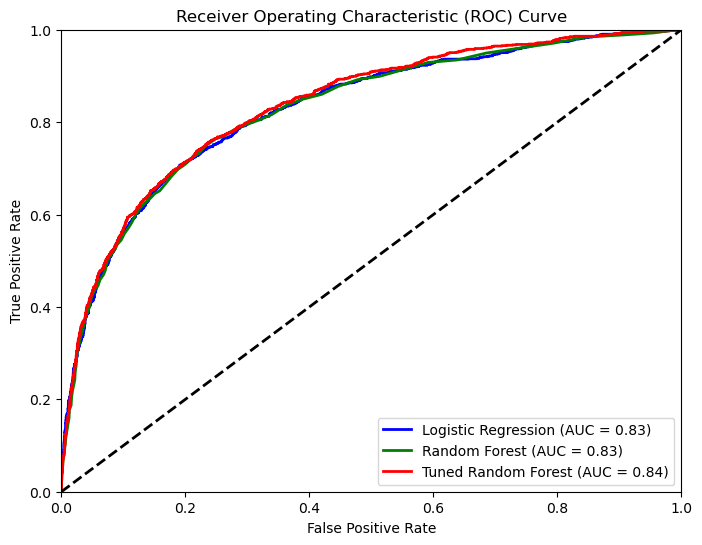

In [31]:
# Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train_array)
logreg_probs = logreg_model.predict_proba(X_test_scaled)[:, 1]

# Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_array)
rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]

# Hyperparameter Tuned Random Forest model
rf_tuned_probs = grid_search.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_logreg, tpr_logreg, _ = roc_curve(y_test_array, logreg_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test_array, rf_probs)
fpr_rf_tuned, tpr_rf_tuned, _ = roc_curve(y_test_array, rf_tuned_probs)

# Compute AUC (Area Under the Curve) for each model
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_rf_tuned = auc(fpr_rf_tuned, tpr_rf_tuned)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_rf_tuned, tpr_rf_tuned, color='red', lw=2, label=f'Tuned Random Forest (AUC = {roc_auc_rf_tuned:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### -> The Tuned Random Forest Model achieves an accuracy of 84.05%, which is slightly higher than the untuned Random Forest model (83.90%). The hyperparameter tuning has led to a modest improvement in overall accuracy.
#### -> In the Precision and Recall for Class 1 (Vaccinated) results, the Tuned Random Forest Model maintains similar precision for identifying individuals who received the vaccination compared to the untuned model, but the recall has slightly increased. It is successfully identifying a higher proportion of actual positives.
#### -> In the Precision and Recall for Class 0 (Unvaccinated) results, the Tuned Random Forest Model maintains high precision and recall for individuals who did not receive the vaccination, with no significant changes compared to the untuned model.
#### -> The F1-score is 0.82, consistent with the untuned Random Forest model. It indicates a balanced trade-off between precision and recall.
#### -> The Tuned Random Forest Model exhibits fewer false positives and false negatives compared to the untuned model. This suggests that the hyperparameter tuning has led to a more optimized model with improved classification performance.
#### -> The hyperparameter tuning of the Random Forest model has resulted in a slightly improved model, especially in correctly identifying individuals who received the vaccination (higher recall for Class 1).
#### -> The model maintains its robustness in correctly classifying individuals who did not receive the vaccination, indicating the generalization of the model's performance.
#### -> In summary, the Tuned Random Forest Model demonstrates a subtle enhancement in key metrics, providing a more refined and optimized solution for predicting H1N1 vaccination status. The adjustments made during hyperparameter tuning contribute to improved model performance, particularly in capturing positive instances.

### Predictive Findings

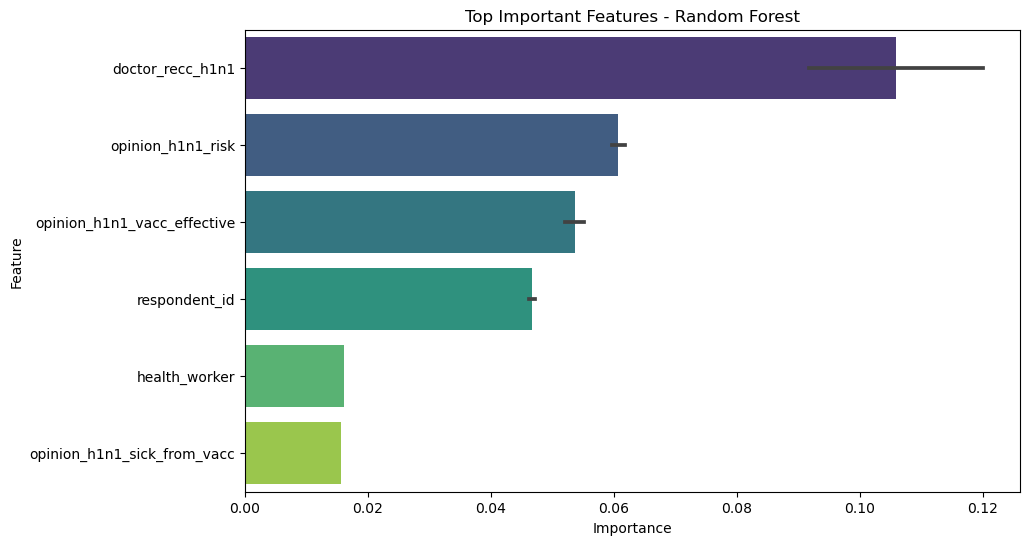

In [32]:
# Get feature importances from the tuned Random Forest model
feature_importances = grid_search.best_estimator_.feature_importances_

# Creating a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N important features
top_n_features = 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n_features), palette='viridis')
plt.title('Top Important Features - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## TESTING MODELS WITH UNSEEN DATA

In [33]:
#New unseen dataset
test_df = pd.read_csv("test_set_features.csv")
test_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


### Data Preprocessing

In [34]:
# drop columns unrelated to h1n1 vaccine

test_df.drop(columns=['opinion_seas_vacc_effective', 'opinion_seas_risk', 
                                'opinion_seas_sick_from_vacc', 'doctor_recc_seasonal'], inplace=True)
test_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [35]:
#checking for missing values
test_df.isnull().sum()

respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
marital_status                  1442
rent_or_own                     2036
employment_status               1471
hhs_geo_region                     0
c

In [36]:
# Drop columns with high missing values
test_threshold = 0.5  # Threshold for dropping columns (50%)
test_cols_to_drop = test_df.columns[test_df.isnull().mean() > test_threshold]
test_features_dropped = test_df.drop(columns=test_cols_to_drop)

test_dropped_features = list(set(test_df.columns) - set(test_features_dropped.columns))

print(f"The feature that has been dropped is: {test_dropped_features} for exceeding the missing values threshold")

The feature that has been dropped is: ['employment_occupation'] for exceeding the missing values threshold


### Handling Missing Values

In [37]:
categorical_cols = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own',
                    'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry']
binary_cols = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
                  'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face',
                  'doctor_recc_h1n1', 'chronic_med_condition',
                  'child_under_6_months', 'health_worker', 'health_insurance']
numerical_cols = ['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 
                  'opinion_h1n1_sick_from_vacc', 'household_adults', 'household_children']

# Impute binary missing values with mode
test_binary_imputer = SimpleImputer(strategy='most_frequent')
test_features_dropped[binary_cols] = test_binary_imputer.fit_transform(test_features_dropped[binary_cols])

# Impute numerical missing values with median
test_numerical_imputer = SimpleImputer(strategy='median')
test_features_dropped[numerical_cols] = test_numerical_imputer.fit_transform(test_features_dropped[numerical_cols])

# Impute categorical missing values with a placeholder (you may want to explore more advanced methods for these)
test_features_dropped[categorical_cols] = test_features_dropped[categorical_cols].fillna('Unknown')


In [38]:
#checking for missing values
test_features_dropped.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
employment

In [39]:
# Dataset containing data of if a person was vaccinated or not 1 = yes & 0 = no
test_vaccination_status = pd.read_csv("training_set_labels.csv")
test_vaccination_status

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [40]:
# Merge h1n1_vaccine feature to our training_features_dropped dataframe

test_merged_df = pd.merge(test_features_dropped, test_vaccination_status[['respondent_id', 'h1n1_vaccine']], on='respondent_id', how='left')
test_merged_df.head(10)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,h1n1_vaccine
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,NaN
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,NaN
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,NaN
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,Unknown,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,NaN
5,26712,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Own,Employed,mlyzmhmf,"MSA, Principle City",0.0,2.0,fcxhlnwr,NaN
6,26713,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Unknown,Married,Own,Not in Labor Force,fpwskwrf,"MSA, Not Principle City",1.0,0.0,Unknown,NaN
7,26714,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Unemployed,oxchjgsf,"MSA, Not Principle City",1.0,0.0,Unknown,NaN
8,26715,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Unknown,Married,Own,Not in Labor Force,oxchjgsf,"MSA, Not Principle City",1.0,0.0,Unknown,NaN
9,26716,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,"> $75,000",Not Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",0.0,0.0,Unknown,NaN


In [41]:
test_merged_df.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty                  object
marital_status                  object
rent_or_own                     object
employment_status        

In [42]:
# List of categorical columns
categorical_cols = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry']

# Apply one-hot encoding to the specified columns
test_merged_df_encoded = pd.get_dummies(test_merged_df, columns=categorical_cols)

# Define a function to fill NaN values with the median
def fill_nan_with_median(column):
    median_val = column.median()
    return column.fillna(median_val)

# Apply the custom function to fill NaN values
test_merged_df_encoded = test_merged_df_encoded.apply(fill_nan_with_median, axis=0)

# Convert Boolean values to integers (1s and 0s)
test_merged_df_encoded = test_merged_df_encoded.astype(float).fillna(0).astype(int)

# Step 2: Concatenate the one-hot encoded columns with the original DataFrame
test_merged_df = pd.concat([test_merged_df, test_merged_df_encoded], axis=1)

# Step 3: Drop the original 'age_group' column if needed
test_merged_df = test_merged_df.drop(columns=categorical_cols, axis=1)

test_merged_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_industry_phxvnwax,employment_industry_pxcmvdjn,employment_industry_qnlwzans,employment_industry_rucpziij,employment_industry_saaquncn,employment_industry_vjjrobsf,employment_industry_wlfvacwt,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
X_new = test_merged_df.drop(['h1n1_vaccine'], axis=1)
y_new = test_merged_df['h1n1_vaccine']

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42)

In [44]:
# Standardizing the data
X_new_scaled = scaler.transform(X_new)

In [45]:
# Logistic Regression Model
logreg_predictions = logreg_model.predict(X_new_scaled)
logreg_probabilities = logreg_model.predict_proba(X_new_scaled)[:, 1]

# Random Forest Model
rf_predictions = rf_model.predict(X_new_scaled)
rf_probabilities = rf_model.predict_proba(X_new_scaled)[:, 1]

# Tuned Random Forest Model
rf_tuned_predictions = grid_search.predict(X_new_scaled)
rf_tuned_probabilities = grid_search.predict_proba(X_new_scaled)[:, 1]

# Display predictions
print("Logistic Regression Predictions:", logreg_predictions)
print("Random Forest Predictions:", rf_predictions)
print("Tuned Random Forest Predictions:", rf_tuned_predictions)

# Display probabilities (likelihood of getting the vaccine)
print("Logistic Regression Probabilities:", logreg_probabilities)
print("Random Forest Probabilities:", rf_probabilities)
print("Tuned Random Forest Probabilities:", rf_tuned_probabilities)

Logistic Regression Predictions: [0 0 0 ... 0 0 0]
Random Forest Predictions: [0 0 0 ... 0 0 0]
Tuned Random Forest Predictions: [0 0 0 ... 0 0 0]
Logistic Regression Probabilities: [0.07075745 0.04232283 0.4803771  ... 0.11751661 0.04725864 0.25311135]
Random Forest Probabilities: [0.23 0.21 0.43 ... 0.21 0.11 0.31]
Tuned Random Forest Probabilities: [0.19486073 0.12414994 0.42459449 ... 0.15056607 0.09533252 0.40202332]


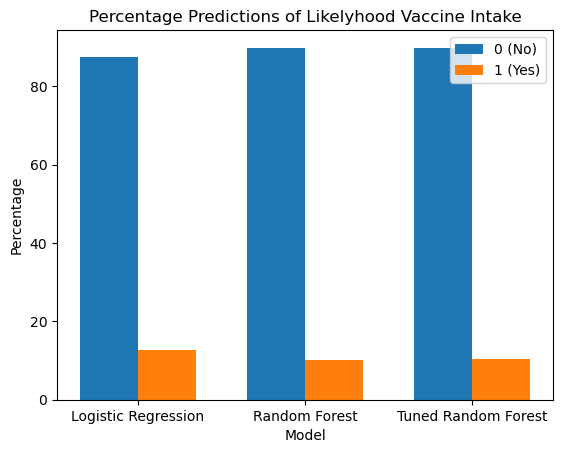

In [46]:
# Function to calculate percentage and create bar graph
def plot_percentage(predictions, model_name):
    percentage_0 = np.mean(predictions == 0) * 100
    percentage_1 = np.mean(predictions == 1) * 100
    return percentage_0, percentage_1

# Calculate percentages for each model
logreg_percentage_0, logreg_percentage_1 = plot_percentage(logreg_predictions, 'Logistic Regression')
rf_percentage_0, rf_percentage_1 = plot_percentage(rf_predictions, 'Random Forest')
rf_tuned_percentage_0, rf_tuned_percentage_1 = plot_percentage(rf_tuned_predictions, 'Tuned Random Forest')

# Create a bar graph
models = ['Logistic Regression', 'Random Forest', 'Tuned Random Forest']
percentages_0 = [logreg_percentage_0, rf_percentage_0, rf_tuned_percentage_0]
percentages_1 = [logreg_percentage_1, rf_percentage_1, rf_tuned_percentage_1]

bar_width = 0.35
index = np.arange(len(models))

plt.bar(index - bar_width / 2, percentages_0, width=bar_width, label='0 (No)')
plt.bar(index + bar_width / 2, percentages_1, width=bar_width, label='1 (Yes)')

plt.xlabel('Model')
plt.ylabel('Percentage')
plt.title('Percentage Predictions of Likelyhood Vaccine Intake')
plt.xticks(index, models)
plt.legend()
plt.show()


In [47]:
test_threshold = 0.5

# Convert probabilities to binary predictions based on the threshold
binary_predictions_logreg = (logreg_probabilities >= test_threshold).astype(int)
binary_predictions_rf = (rf_probabilities >= test_threshold).astype(int)
binary_predictions_rf_tuned = (rf_tuned_probabilities >= test_threshold).astype(int)

# Calculate the percentage of people likely to receive the vaccine
percentage_logreg = np.mean(binary_predictions_logreg) * 100
percentage_rf = np.mean(binary_predictions_rf) * 100
percentage_rf_tuned = np.mean(binary_predictions_rf_tuned) * 100

print(f'Percentage likely to receive vaccine (Logistic Regression): {percentage_logreg:.2f}%')
print(f'Percentage likely to receive vaccine (Random Forest): {percentage_rf:.2f}%')
print(f'Percentage likely to receive vaccine (Tuned Random Forest): {percentage_rf_tuned:.2f}%')

Percentage likely to receive vaccine (Logistic Regression): 12.66%
Percentage likely to receive vaccine (Random Forest): 10.91%
Percentage likely to receive vaccine (Tuned Random Forest): 10.37%


# CONCLUSION

#### The results suggest that the predictive models, especially the Logistic Regression, have lower percentages of individuals likely to receive the H1N1 vaccine compared to the baseline vaccination rate. This indicates that the models might be conservative in predicting vaccine acceptance.

## Predictive Findings:

#### -> The Logistic Regression model predicts approximately 12.66% likelihood, while the Random Forest and Tuned Random Forest models predict lower percentages (10.91% and 10.37%, respectively).
#### -> The predictive performance varies, and Logistic Regression seems to be more optimistic in predicting vaccine acceptance.

## Important Features:

#### -> Further analysis on feature importance from the models can provide insights into which variables are influencing the predictions. Consider evaluating feature importance using the model's attribute (e.g., coef_ for Logistic Regression or feature_importances_ for Random Forest).

## Predictive Recommendation:

#### -> The models might not be capturing certain factors influencing vaccine acceptance adequately. It's crucial to consider additional external factors or variables not present in the current dataset that could impact the predictions.
#### T-> he predictions might not be useful in situations where external factors, such as evolving public health policies, change rapidly and are not reflected in the dataset.

## Business Modification Suggestions:

#### -> Regularly update the model with the latest data to ensure it reflects the current vaccination landscape.
#### -> Explore the inclusion of additional features or external data sources that could enhance the model's predictive power.
#### -> Consider re-evaluating and updating the model periodically to adapt to changing circumstances and improve overall performance.
#### -> In summary, the models provide insights into vaccine acceptance likelihood, but their conservative nature suggests caution in relying solely on these predictions. Regular updates and consideration of external factors are essential for maintaining model relevance and accuracy.